In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
original_data = pd.read_excel("datasets/Online_shopping.xlsx")

In [4]:
df = original_data.copy()

## Problem statemets:

- Customer Segmentation and Recommendation
- 1.Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary)
- 2.Identify trends for Day, Month, Season, Time by Invoice count
- 3.Create a recommendation of different product as per specific client.
- 4 Movie Recommendation as per Movie Tags / Review.(MOVIE DATASET)


In [5]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1.Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary)

In [6]:
# Recency------> (latestdate) - (lastdate of invoice of customer)
# frequency-----> total number of invoice generated for a particular customer
# Monetary------->sum of all invoice of a perticular customer

In [7]:
df['Country'].value_counts(normalize = True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [9]:
# segmentation(customer grouping) on basis of Recency,frequency and monetary

In [12]:
# we dont require the following features so let's drop them from dataset stockcode,Description, lower, Country
df1 = df.drop(['StockCode','Description','lower','Country'],axis=1)

In [11]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [12]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [13]:
# practice purpose:

In [14]:
df100 = df1.copy()

In [15]:
first_df = df100[df100['CustomerID'].notnull()]
second_df = df100[df100['CustomerID'].isnull()]

In [16]:
second_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,56,2010-12-01 11:52:00,0.00,NaN
1443,536544,1,2010-12-01 14:32:00,2.51,NaN
1444,536544,2,2010-12-01 14:32:00,2.51,NaN
1445,536544,4,2010-12-01 14:32:00,0.85,NaN
1446,536544,2,2010-12-01 14:32:00,1.66,NaN
...,...,...,...,...,...
541536,581498,5,2011-12-09 10:26:00,4.13,NaN
541537,581498,4,2011-12-09 10:26:00,4.13,NaN
541538,581498,1,2011-12-09 10:26:00,4.96,NaN
541539,581498,1,2011-12-09 10:26:00,10.79,NaN


In [17]:
first_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [18]:
testing = first_df['InvoiceNo'].isin(second_df['InvoiceNo'])

In [19]:
testing

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 406829, dtype: bool

In [20]:
testing.value_counts()

False    406829
Name: InvoiceNo, dtype: int64

# Continue the project

In [21]:
# Let's drop the null values
df1.dropna(axis=0,inplace=True)

In [22]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [23]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


# Observations
- quantity is negative because of returned items
- unit price can be 0 because of free giving of items

In [23]:
df1['InvoiceDate'].dtype

dtype('<M8[ns]')

In [24]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [25]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [26]:
# we are not considering return as no business but we are not dropping those transactions and customers

In [31]:
# let's consider the invoice numbers where quantity must greater than 0.
df1 = df1[df1['Quantity']>0]

In [32]:
df1.describe(include = "all")

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.0,397924.000000,397924,397924.000000,397924.000000
unique,18536.0,NaN,17286,NaN,NaN
top,576339.0,NaN,2011-11-14 15:27:00,NaN,NaN
freq,542.0,NaN,542,NaN,NaN
first,NaN,NaN,2010-12-01 08:26:00,NaN,NaN
last,NaN,NaN,2011-12-09 12:50:00,NaN,NaN
mean,NaN,13.021823,NaN,3.116174,15294.315171
std,NaN,180.420210,NaN,22.096788,1713.169877
min,NaN,1.000000,NaN,0.000000,12346.000000
25%,NaN,2.000000,NaN,1.250000,13969.000000


In [33]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [34]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [35]:
# create a column total = Quantity * UnitPrice

In [36]:
df1['Total'] = df1['Quantity']*df1['UnitPrice']
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [37]:
df2 = df1.drop(['Quantity','UnitPrice'],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [38]:
df_final_100 = df2.groupby('InvoiceNo').agg({
    'Total':'sum'
}).reset_index()
df_final_100.head()

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [39]:
df_final=df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({
    'Total':'sum'
}).reset_index()

In [40]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [41]:
duplicate1 = df_final[df_final.duplicated(subset=['InvoiceNo'])]
duplicate1

,InvoiceNo,InvoiceDate,CustomerID,Total
117,536591,2010-12-01 16:58:00,14606.0,39.06
1472,540185,2011-01-05 13:41:00,14653.0,132.66
1967,541596,2011-01-19 16:19:00,17602.0,581.13
1979,541631,2011-01-20 10:48:00,12637.0,935.13
2039,541816,2011-01-21 15:57:00,17799.0,122.44
2056,541849,2011-01-23 13:34:00,13230.0,154.79
2195,542217,2011-01-26 12:36:00,14606.0,158.50
2411,542806,2011-02-01 11:20:00,12836.0,798.99
2564,543179,2011-02-04 10:32:00,12754.0,23.93
2788,543777,2011-02-11 16:20:00,15406.0,243.04


In [42]:
len(duplicate1)

30

In [43]:
df_final[df_final['InvoiceNo']==544667].Total

3147    1980.82
3148    1355.94
Name: Total, dtype: float64

In [44]:
df_final10 = df_final.drop_duplicates(subset=['InvoiceNo'])
df_final10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18536 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18536 non-null  int64         
 1   InvoiceDate  18536 non-null  datetime64[ns]
 2   CustomerID   18536 non-null  float64       
 3   Total        18536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 724.1 KB


In [45]:
# another option :

In [46]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [47]:
# df3 is a dataframe having only invoicedate and cutomer id
df3 = df2.drop(['InvoiceDate','CustomerID'],axis=1)
df4 = df2.drop(['Total'],axis=1)

In [48]:
df3.head()

,InvoiceNo,Total
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34


In [49]:
df4.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536365,2010-12-01 08:26:00,17850.0
2,536365,2010-12-01 08:26:00,17850.0
3,536365,2010-12-01 08:26:00,17850.0
4,536365,2010-12-01 08:26:00,17850.0


In [50]:
df3 = df3.groupby(['InvoiceNo']).sum().reset_index()
df3.head()

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [51]:
df4 = df4.drop_duplicates(subset=['InvoiceNo'])
df4.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
7,536366,2010-12-01 08:28:00,17850.0
9,536367,2010-12-01 08:34:00,13047.0
21,536368,2010-12-01 08:34:00,13047.0
25,536369,2010-12-01 08:35:00,13047.0


In [52]:
df_final11 = pd.merge(df4,df3,how = "left",on = 'InvoiceNo')
df_final11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18536 entries, 0 to 18535
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18536 non-null  object        
 1   InvoiceDate  18536 non-null  datetime64[ns]
 2   CustomerID   18536 non-null  float64       
 3   Total        18536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 724.1+ KB


In [53]:
df_final100 = df_final[df_final.duplicated(subset=['CustomerID'])]
df_final100

,InvoiceNo,InvoiceDate,CustomerID,Total
1,536366,2010-12-01 08:28:00,17850.0,22.20
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
7,536372,2010-12-01 09:01:00,17850.0,22.20
8,536373,2010-12-01 09:02:00,17850.0,259.86
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [52]:
# no of customers who purchased only once
len(df_final)-len(df_final100)

4339

In [54]:
# goal 1 :performing customer segmentation on R F M

In [55]:
max(df_final['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [56]:
min(df_final['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [57]:
# the given dataset belongs to Dec 1st 2010 - Dec 9th 2011

In [58]:
# recency = latest date - last invoice date

In [59]:
# to create a latest date


In [60]:
import datetime as dt
latest_date = dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [61]:
# recency--> how recently customer purchased the item
# frequency--->count of invoice no(how many times perticular 
# customer id occured in perticuler duration)

# monetary--->sum of total Money spent

In [62]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [63]:
RFM_Score = df_final.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(latest_date - x.max()).days,
    'InvoiceNo':lambda x:x.count(),
    'Total':lambda x:x.sum()
}).reset_index()   

In [64]:
df22 = df_final[df_final['CustomerID']==12346.0]

In [65]:
df22

,InvoiceNo,InvoiceDate,CustomerID,Total
1911,541431,2011-01-18 10:01:00,12346.0,77183.6


In [66]:
RFM_Score

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


In [67]:
# Rename the column names:
RFM_Score = RFM_Score.rename(columns = {"InvoiceDate":'Recency','InvoiceNo':'Frequency','Total':'Monetary'})

In [68]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [69]:
RFM1=RFM_Score.copy()

In [70]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [71]:
# let's create rank variables on Recency, Frequency and Monetory
RFM1['R_Rank']=RFM1['Recency'].rank(ascending = False)
RFM1['F_Rank']=RFM1['Frequency'].rank(ascending = True)
RFM1['M_Rank']=RFM1['Monetary'].rank(ascending = True)

In [72]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [73]:
# let's calculate the final values by dividing rank variable with it's maximum value and multiplying with 100
RFM1['R_final']=(RFM1['R_Rank']/RFM1['R_Rank'].max())*100

In [74]:
RFM1['R_final']

0        3.759833
1       96.170754
2       38.084220
3       74.259602
4        5.263767
          ...    
4334     8.213790
4335    19.898195
4336    88.836187
4337    94.042110
4338    54.534938
Name: R_final, Length: 4339, dtype: float64

In [75]:
RFM1['F_final']=(RFM1['F_Rank']/RFM1['F_Rank'].max())*100
RFM1['M_final']=(RFM1['M_Rank']/RFM1['M_Rank'].max())*100

In [76]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [77]:
# let's drop rank variables as these are not required now.
RFM1.drop(columns=['R_Rank','F_Rank','M_Rank'],axis=1,inplace=True)

In [79]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546


In [82]:
# we can assign the weightage on R F M below according to the requirement 
# and create RFM_sum variable by adding all these
# here we considered 15% on recency, 30% on frequency, 60% on monetory

In [81]:
RFM1['RFM_SUM']=0.15*RFM1['R_final']+0.30*RFM1['F_final']+0.60*RFM1['M_final']

In [83]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579,65.600850
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327,95.440824
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981,72.751121
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671,62.015870
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546,22.959420


In [84]:
# rounding of the values upto two digits.
RFM1 = RFM1.round(2)
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96


In [85]:
max(RFM1['RFM_SUM'])

104.92

In [86]:
min(RFM1['RFM_SUM'])

5.36

In [88]:
# now let's find  loyality customers like silver, gold, diamond, platinum
loyality_label = ['Silver','Gold','Diamond','Platinum']

In [89]:
QUANTILE100 = RFM1['RFM_SUM'].quantile(q=[0.25,0.5,0.75])

In [90]:
QUANTILE100

0.25    28.365
0.50    51.290
0.75    75.885
Name: RFM_SUM, dtype: float64

In [91]:
# create a function 
def Loyality(x):
    if x<=28:
        return 'Silver'
    elif x<=51:
        return 'Gold'
    elif x<=76:
        return 'Diamond'
    else:
        return 'Platinum'
    

In [92]:
RFM1['Loyality'] = RFM1['RFM_SUM'].apply(Loyality)

In [93]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver


In [94]:
RFM1['Loyality'].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [95]:
# all the above seggregation is mannual approach

# KMeans algorithm:

In [96]:
# same thing we can do here also

In [98]:
New_data = RFM1['RFM_SUM']
# New_data.head()
New_data=pd.DataFrame(New_data)
New_data.head()

,RFM_SUM
0,65.60
1,95.44
2,72.75
3,62.02
4,22.96


In [100]:
from sklearn.cluster import KMeans

In [101]:
Kmeans1 = KMeans(n_clusters=4,max_iter =100,random_state = 10 )
y_means = Kmeans1.fit_predict(New_data)
y_means

array([3, 0, 3, ..., 1, 0, 3])

In [102]:
RFM1['Cluster'] = Kmeans1.labels_
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2


In [103]:
RFM1['Cluster'].value_counts()

2    1250
1    1107
3    1039
0     943
Name: Cluster, dtype: int64

In [104]:
RFM1['Loyality'].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [105]:
# Evaluation of cluster:

In [106]:
from sklearn.metrics import silhouette_score

In [107]:
labels = Kmeans1.labels_
print(silhouette_score(New_data,labels))

0.5649352983403836


# Goal:2 
- Analysing sales trend --> as per day,time,month,season,weekend

In [108]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [109]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [110]:
df_final00=df_final.copy()
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
1,536366,2010-12-01 08:28:00,17850.0,22.20
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
7,536372,2010-12-01 09:01:00,17850.0,22.20
8,536373,2010-12-01 09:02:00,17850.0,259.86


In [111]:
# how to extract info from Datetime data type:

In [112]:
import datetime as dt

In [113]:
df_final100['Day']=df_final100['InvoiceDate'].dt.day_name()

In [114]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday


In [115]:
df_final100['Day'].value_counts()

Thursday     3086
Wednesday    2628
Tuesday      2503
Friday       2198
Monday       2191
Sunday       1621
Name: Day, dtype: int64

In [116]:
df_final100['Month']=df_final100['InvoiceDate'].dt.month

In [117]:
df_final100['Hour']=df_final100['InvoiceDate'].dt.hour

In [118]:
# df_final100['Date']=df_final100['InvoiceDate'].dt.Date

In [119]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday,12,9
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday,12,9


In [120]:
df_final100['Week_info']=np.where((df_final100.Day=='Saturday')|(df_final100.Day=='Sunday'),"Weekend","Weekday")

In [121]:
df_final100

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Week_info
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Weekday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Weekday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Weekday
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday,12,9,Weekday
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday,12,9,Weekday
...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,Weekday
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,Weekday
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,Weekday
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,Weekday


In [122]:
# analysing the business as per day: 

In [123]:
day_count=df_final100.groupby('Day')['InvoiceNo'].count().to_frame("count_of_invoices").reset_index()

In [124]:
# df_final100.groupby('Day')['InvoiceNo'].count().reset_index()

In [125]:
day_count

,Day,count_of_invoices
0,Friday,2198
1,Monday,2191
2,Sunday,1621
3,Thursday,3086
4,Tuesday,2503
5,Wednesday,2628


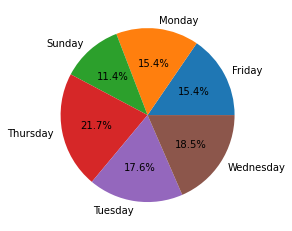

In [126]:
plt.pie(day_count['count_of_invoices'],autopct='%0.01f%%',labels=day_count['Day'])
plt.show()

# Task:
- plot the number of invoices by season-->winter,monsoon,summer,spring
- plot the no. of invoices by morning ,afternoon,evening


In [128]:
def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    if x in [2,3]:
        return "spring"
    if x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [129]:
def cal_timing(x):
    if x in range(4,7):
        return "early morning"
    elif x in range(7,11):
        return "Morning"
    elif x in range(11,16):
        return "afternoon"
    else:
        return "evening"

In [130]:
df_final100["season"]=df_final100["Month"].apply(cal_season)

In [131]:
df_final100["Time"]=df_final100["Hour"].apply(cal_timing)

In [132]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Week_info,season,Time
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Weekday,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Weekday,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Weekday,Winter,Morning
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday,12,9,Weekday,Winter,Morning
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday,12,9,Weekday,Winter,Morning


In [133]:
df_final100["Time"].value_counts()

afternoon        9453
Morning          3249
evening          1524
early morning       1
Name: Time, dtype: int64

In [134]:
season_count = df_final100.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')

In [135]:
season_count.reset_index(inplace=True)

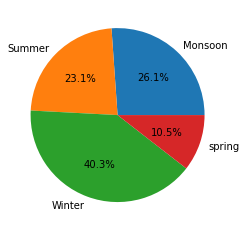

In [136]:
season_count
plt.pie(season_count.count_of_invoices,labels=season_count['season'],autopct='%.1f%%')
plt.show()

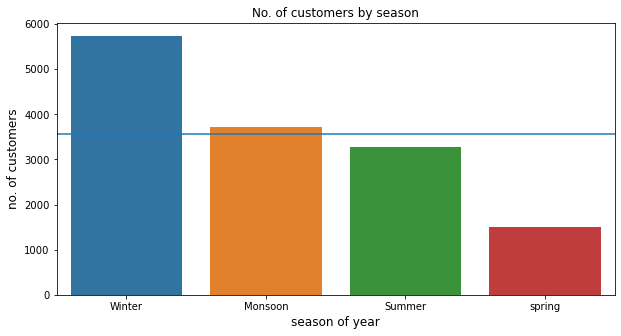

In [137]:
# plot number of customers by season graph
season=df_final100["season"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(season.index,season.values)
#plot the average 
plt.axhline(y=season.mean())
plt.title("No. of customers by season")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("season of year",fontsize=12)
plt.show()

# RECOMMONDATION ENGINE: 3 types
- 1.Collaborative filtering approach
- 2.Content based filtering
- 3.Hybrid model

### Collaborative based filtering : 
- based on customer sililarity recommendation will be made 
- suppose if you like movie : x,y,z,u
- another person likes :x,y,z,j
- then it will recommend j for you and for another person it will recommend you.

### Content based :
- Based on thedescription of words,tags ,rating,etc.,

### Hybrid model:
- combination of content and collaborative bsed systems..

In [138]:
original_data = pd.read_excel("datasets/Online_shopping.xlsx")

In [139]:
df50 = original_data.copy()
df50.copy()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [140]:
# drop the column lower

In [141]:
df50 = df50.drop("lower",axis=1)

In [142]:
df50.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [143]:
df50.dropna(axis=0,inplace= True)

In [144]:
df50.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [145]:
df50.shape

(406829, 8)

In [146]:
# to apply the function to find degree of similarity we need 
# Step 1-----> create PIVOT_table--on stock code,customerid
# step 2-----> apply cosine similarity function on pivot_table 

In [147]:
custI_matrix = df50.pivot_table(index = "CustomerID",columns = "StockCode",values = "Quantity",aggfunc = "sum",
                                 fill_value = 0)

In [148]:
custI_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# we want to see the similarity or filteration of item code as per CustomerID using collaborative filtering approach

In [150]:
from sklearn.metrics.pairwise import cosine_similarity

In [151]:
similarity = cosine_similarity(custI_matrix)

In [152]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.14887891, ..., 0.01192112, 0.07451023,
        0.10894226],
       [0.        , 0.14887891, 1.        , ..., 0.        , 0.17517012,
        0.11009593],
       ...,
       [0.        , 0.01192112, 0.        , ..., 1.        , 0.00377618,
        0.        ],
       [0.        , 0.07451023, 0.17517012, ..., 0.00377618, 1.        ,
        0.04444524],
       [0.        , 0.10894226, 0.11009593, ..., 0.        , 0.04444524,
        1.        ]])

In [153]:
similarity.shape

(4372, 4372)

In [154]:
similarity[90]

array([0.        , 0.0299703 , 0.03342911, ..., 0.        , 0.07895145,
       0.        ])

In [155]:
sorted(similarity[90],reverse = True)

[1.0,
 0.5692838086641905,
 0.4837798571304113,
 0.4545992099057214,
 0.4229365246114713,
 0.3769227994294265,
 0.37127016455873063,
 0.3328636210502275,
 0.2606987445498944,
 0.2595845219458487,
 0.256633715996664,
 0.24708712314846387,
 0.23419854166404377,
 0.23192017485063052,
 0.2286203723271083,
 0.22838695213929686,
 0.2275677858678694,
 0.22606605083421424,
 0.22181761380513712,
 0.22126817805268817,
 0.21911668444601987,
 0.2170290677790022,
 0.2147732641325767,
 0.21098376350700837,
 0.2102227773792679,
 0.20905490262313375,
 0.20307135051098543,
 0.20142453057890736,
 0.2009578720828636,
 0.19949631890301403,
 0.19680945562099778,
 0.19486850119745966,
 0.19264620958460876,
 0.1916899542184103,
 0.19091906567832984,
 0.1905647258148831,
 0.18924927144252784,
 0.1871177598464085,
 0.18588393233524964,
 0.185625170531923,
 0.1852378181748003,
 0.1850704730607473,
 0.18494863784857685,
 0.18465807992446226,
 0.1832074951643581,
 0.18301370976137235,
 0.18291385949842237,
 0.182

In [156]:
final = pd.DataFrame(similarity)

In [157]:
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


In [158]:
# we need to set the customerID at rows and columns

In [159]:
final.columns = custI_matrix.index

In [160]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.0,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [161]:
final["CustomerID"] = custI_matrix.index

In [162]:
final = final.set_index("CustomerID")

In [163]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.0,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [164]:
# above matrix is the degree of similarity among the customers. 
# we can use this degree of similarity for the recommendation purpose

In [165]:
# for example 12350.0 take reference of customer 

In [166]:
final.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
15180.0    0.337317
15422.0    0.336127
13455.0    0.228141
15435.0    0.214309
             ...   
16217.0   -0.000602
18270.0   -0.000618
16252.0   -0.047206
14304.0   -0.053090
17548.0   -0.054147
Name: 12350.0, Length: 4372, dtype: float64

In [167]:
# customer -->12350.0 is having highest degree of similarity with 15180.0

item_cust_A = set(custI_matrix.loc[12350.0].iloc[custI_matrix.loc[12350.0].to_numpy().nonzero()].index)


In [168]:
item_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [169]:
# customer B-->15180.0

item_cust_B = set(custI_matrix.loc[15180.0].iloc[custI_matrix.loc[15180.0].to_numpy().nonzero()].index)




In [170]:
item_cust_B

{22112, 22113, 22114, 22348, 22835, 72741}

In [171]:
Recommended_item_list_cust_A = item_cust_B - item_cust_A


In [172]:
Recommended_item_list_cust_A

{22112, 22113, 22114, 22835, 72741}

In [173]:
df50.loc[df50["StockCode"].isin(item_cust_B),['StockCode','Description']].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22114,HOT WATER BOTTLE TEA AND SYMPATHY
22835,HOT WATER BOTTLE I AM SO POORLY
22112,CHOCOLATE HOT WATER BOTTLE
22113,GREY HEART HOT WATER BOTTLE
72741,GRAND CHOCOLATECANDLE
22348,TEA BAG PLATE RED RETROSPOT


# Finding life time valuation of cutomer:

In [174]:
# Customer life time valuation -- it is a marking scheme 
# quantitative analysis in the business scenario ... sales promotion will be decided accordingly on 
# the basis of cutomer life time valuation.

In [175]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2


In [176]:
RFM_100 = RFM1.copy()

In [177]:
#  average order value--->contribution in business by a perticular customer

In [178]:
RFM_100["Average_order_value"] = RFM_100['Monetary']/RFM_100['Frequency']

In [179]:
RFM_100

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster,Average_order_value
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3,77183.600000
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0,615.714286
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3,449.310000
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3,1757.550000
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2,334.400000
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,8.21,17.20,13.00,14.19,Silver,2,180.600000
4335,18281.0,180,1,80.82,19.90,17.20,2.42,9.60,Silver,2,80.820000
4336,18282.0,7,2,178.05,88.84,44.03,12.61,34.10,Gold,1,89.025000
4337,18283.0,3,16,2094.88,94.04,96.39,80.41,91.27,Platinum,0,130.930000


In [180]:
sum(RFM_100["Frequency"])

18566

In [181]:
#  Purchase Frequency:
purchase_frequency = (sum(RFM_100["Frequency"]))/RFM_100.shape[0]

In [182]:
purchase_frequency

4.278866098179304

In [183]:
#  Repeat rate:
repeat_rate = RFM_100[RFM_100["Frequency"]>1].shape[0]/RFM_100.shape[0]

In [184]:
repeat_rate  # 65% customers repeating

0.6561419681954367

In [185]:
churning_rate = 1-repeat_rate
churning_rate  # chances that about  34% customer can churn

0.3438580318045633

#  profit_margin &life time validation

In [186]:
RFM_100["Purchase_Margin"] = RFM_100['Monetary']*0.20
# customer value
RFM_100['CLTV'] = RFM_100["Average_order_value"]*purchase_frequency/churning_rate

In [187]:
RFM_100.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster,Average_order_value,Purchase_Margin,CLTV
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3,77183.600000,15436.720,960449.542627
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0,615.714286,862.000,7661.763692
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3,449.310000,359.448,5591.078727
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3,1757.550000,351.510,21870.424464
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2,334.400000,66.880,4161.173190


In [ ]:
# find the best selling top10 selling products
# top selling product country wise
# sales trend -- lines plots
# Mean sales month wise,which month has average sales below average ,above avarage,
# product wise sales


# Find the best top10 selling products

In [188]:
df20 = original_data.copy()
df20.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [204]:
product_sales = df20.groupby('Description')['Quantity'].sum().reset_index()
product_sales

,Description,Quantity
0,20713,-400
1,4 PURPLE FLOCK DINNER CANDLES,144
2,50'S CHRISTMAS GIFT BAG LARGE,1913
3,DOLLY GIRL BEAKER,2448
4,I LOVE LONDON MINI BACKPACK,389
...,...,...
4218,wrongly marked carton 22804,-256
4219,wrongly marked. 23343 in box,-3100
4220,wrongly sold (22719) barcode,170
4221,wrongly sold as sets,-600


In [206]:
top_sold_items = product_sales.sort_values(by='Quantity',ascending = False)
top_10_sold_items = top_sold_items.head(10)
top_10_sold_items
# these are the top 10 sold items

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


# Top selling product country wise

In [210]:
country_product_sales = df20.groupby(['Country','Description'])['Quantity'].sum().reset_index()



In [212]:
# find the indexx of maximum quantity sold for each product
idx = country_product_sales.groupby('Country')['Quantity'].idxmax()

In [213]:
# select the rows with the top selling products for each country
top_selling_products = country_product_sales.loc[idx]
top_selling_products

,Country,Description,Quantity
287,Australia,MINI PAINT SET VINTAGE,2916
854,Austria,SET 12 KIDS COLOUR CHALK STICKS,288
921,Bahrain,ICE CREAM SUNDAE LIP GLOSS,96
1348,Belgium,PACK OF 72 RETROSPOT CAKE CASES,480
1719,Brazil,DOLLY GIRL LUNCH BOX,24
1847,Canada,RETRO COFFEE MUGS ASSORTED,504
2185,Channel Islands,RAIN PONCHO,407
2527,Cyprus,HEART DECORATION PAINTED ZINC,384
2853,Czech Republic,WOODEN STAR CHRISTMAS SCANDINAVIAN,72
3016,Denmark,RED HARMONICA IN BOX,288


In [232]:
# sales trend -- lines plots

df_trend = df2.copy()

In [233]:
df_trend.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [234]:
df_trend.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
CustomerID            float64
Total                 float64
dtype: object

In [235]:
df_trend = df_trend[['InvoiceDate','Total']]
df_trend

,InvoiceDate,Total
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
...,...,...
541904,2011-12-09 12:50:00,10.20
541905,2011-12-09 12:50:00,12.60
541906,2011-12-09 12:50:00,16.60
541907,2011-12-09 12:50:00,16.60


In [236]:
df_trend['Date'] = df_trend['InvoiceDate'].dt.date
df_trend = df_trend[['Date','Total']]
df_trend

,Date,Total
0,2010-12-01,15.30
1,2010-12-01,20.34
2,2010-12-01,22.00
3,2010-12-01,20.34
4,2010-12-01,20.34
...,...,...
541904,2011-12-09,10.20
541905,2011-12-09,12.60
541906,2011-12-09,16.60
541907,2011-12-09,16.60


In [237]:
df_trend.dtypes

Date      object
Total    float64
dtype: object

In [238]:
df_trend['Date'] = pd.to_datetime(df_trend['Date'])

In [239]:
df_trend.dtypes

Date     datetime64[ns]
Total           float64
dtype: object

In [240]:
df_trend.set_index('Date',inplace = True)
df_trend

,Total
Date,
2010-12-01,15.30
2010-12-01,20.34
2010-12-01,22.00
2010-12-01,20.34
2010-12-01,20.34
...,...
2011-12-09,10.20
2011-12-09,12.60
2011-12-09,16.60


In [241]:
monthly_sales = df_trend['Total'].resample('M').sum()

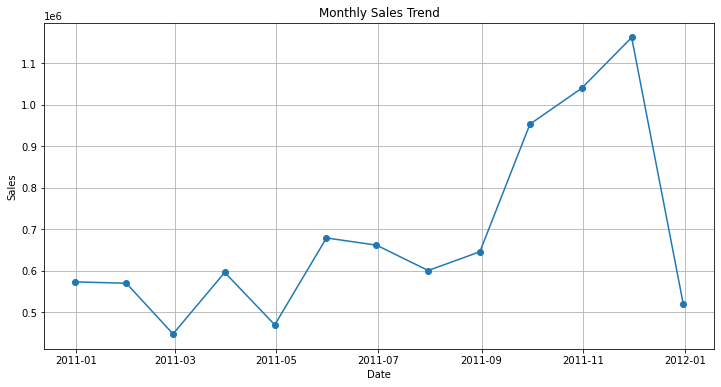

In [242]:
# Let's visualize the trend

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# monthly sales trend from 2010 Dec to 2011 Dec

# Mean sales month wise,which month has average sales below average ,above avarage.

In [245]:
# Calculate mean sales
mean_sales = df_trend['Total'].resample('M').mean()
mean_sales

Date
2010-12-31    21.892733
2011-01-31    26.820132
2011-02-28    22.437643
2011-03-31    21.911939
2011-04-30    20.720737
2011-05-31    23.959980
2011-06-30    24.322740
2011-07-31    22.368920
2011-08-31    23.890123
2011-09-30    23.803107
2011-10-31    20.972189
2011-11-30    18.000114
2011-12-31    29.946416
Freq: M, Name: Total, dtype: float64

In [248]:
# Calculate the overall average sales
overall_average_sales = df_trend['Total'].mean()
overall_average_sales

22.39474850474768

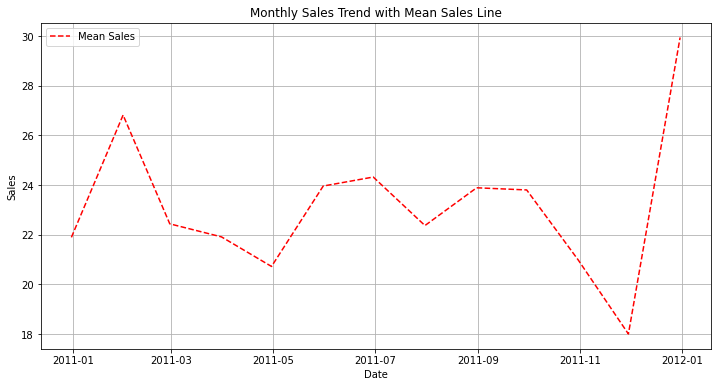

In [251]:
# Create the plot
plt.figure(figsize=(12, 6))
# plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales')

plt.plot(mean_sales.index, mean_sales.values, linestyle='--', color='red', label='Mean Sales')
plt.title('Monthly Sales Trend with Mean Sales Line')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

# observations
- month 2011-02 has average sales above the mean sales and month 2011-12 has the average sales below the mean sales.